<a href="https://colab.research.google.com/github/Hanishkaa01/DEEP-LEARNING-TECHNIQUES-LAB-EXP/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-976515614.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('GOOG', start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open    Volume
Ticker           GOOG       GOOG       GOOG       GOOG      GOOG
Date                                                            
2015-01-02  25.990793  26.310721  25.955632  26.198795  28951268
2015-01-05  25.448999  25.967023  25.408886  25.914031  41196796
2015-01-06  24.859165  25.563153  24.814100  25.504961  57998800
2015-01-07  24.816574  25.120850  24.744764  25.108766  41301082
2015-01-08  24.894823  24.934442  24.316380  24.662554  67071641


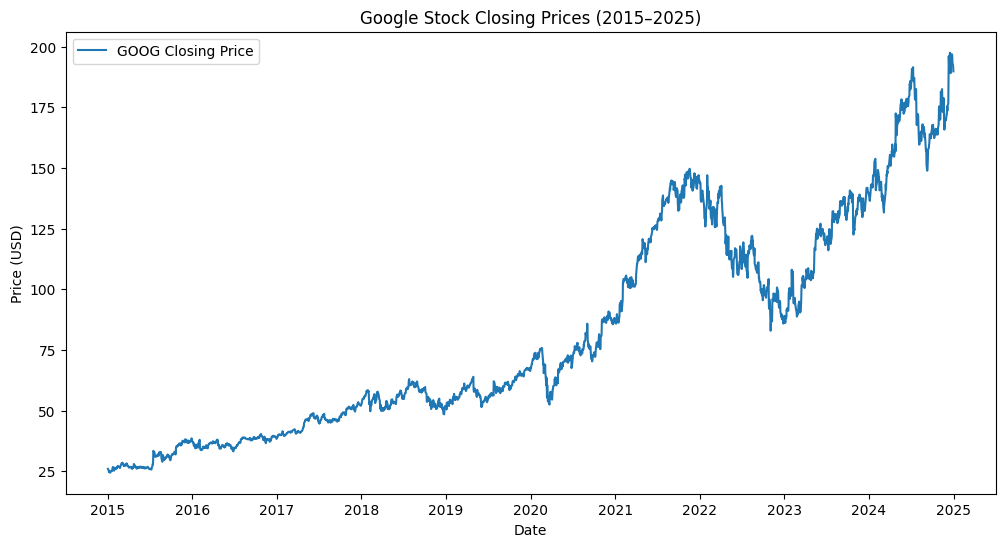

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,301 (282.43 KB)

 Trainable params: 72,301 (282.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - loss: 0.0302 - val_loss: 0.0023
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 9.6084e-04 - val_loss: 0.0057
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0010 - val_loss: 0.0051
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 8.3279e-04 - val_loss: 0.0027
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 8.8299e-04 - val_loss: 0.0011
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - loss: 7.7182e-04 - val_loss: 0.0058
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 8.8044e-04 - val_loss: 0.0017
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 7.2525e-04 - val_loss: 0.0030
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 7.1153e-04 - val_loss: 0.0011
Epoch 12/30
62/62 ━━━━━━━━━━━━━━━

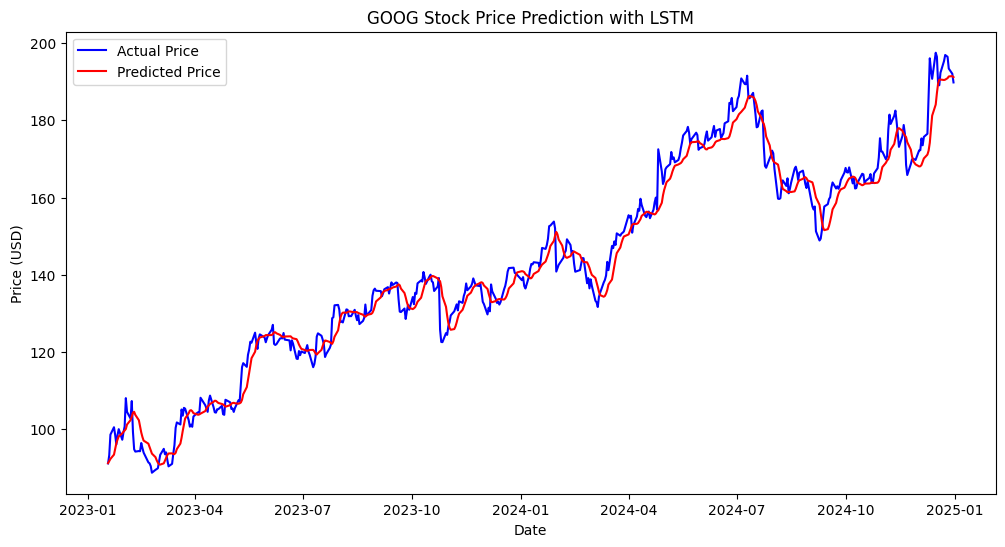

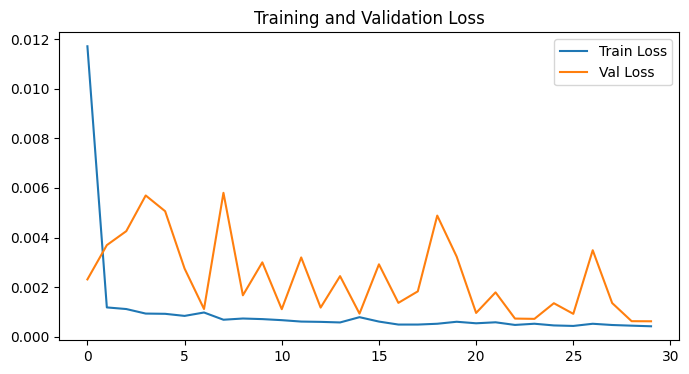

In [2]:
# ===============================
# LSTM on Google Stock Prices (GOOG)
# ===============================

# Step 1: Install dependencies
!pip install yfinance --quiet

# Step 2: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 3: Load Google Stock Data
data = yf.download('GOOG', start='2015-01-01', end='2025-01-01')
print(data.head())

# Step 4: Visualize the Closing Price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='GOOG Closing Price')
plt.title('Google Stock Closing Prices (2015–2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Step 5: Preprocess Data
# Use only the 'Close' column
close_prices = data[['Close']].values

# Scale data (LSTM works better with normalized input)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

SEQ_LEN = 60  # look back 60 days
X, y = [], []

for i in range(SEQ_LEN, len(scaled_data)):
    X.append(scaled_data[i-SEQ_LEN:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 6: Split into Train/Test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 7: Build LSTM Model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(SEQ_LEN, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 8: Train the Model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Step 9: Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 10: Visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test_actual, label='Actual Price', color='blue')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Price', color='red')
plt.title('GOOG Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plot Training Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
